In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 10

In [2]:
import xarray as xr

import xarray_sentinel

In [3]:
#Interferometric Wide Swath (IW)
product_path = (
    "data/S1B_IW_GRDH_1SDV_20211123T170555_20211123T170620_029718_038C0D_5605.SAFE"
)
swath_group = "IW"
swath_polarisation_group = "IW/VV"
measurement_group = "IW/VV"
measurement_block_slices = (slice(2000, 3000), slice(2400, 3500))
digital_number_max = 600

!ls -d {product_path}

data/S1B_IW_GRDH_1SDV_20211123T170555_20211123T170620_029718_038C0D_5605.SAFE


In [4]:
s1=xr.open_dataset(product_path, engine="sentinel-1")


In [5]:
#whos

In [6]:
s1_swath=xr.open_dataset(product_path, engine="sentinel-1", group=swath_group)


In [7]:
s1_swath_pol=xr.open_dataset(product_path, engine="sentinel-1", group=swath_polarisation_group)


Exception ignored in: <function CachingFileManager.__del__ at 0x7f6288e8a440>
Traceback (most recent call last):
  File "/home/ozlem/anaconda3/envs/XARRAY-SENTINEL/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 244, in __del__
    self.close(needs_lock=False)
  File "/home/ozlem/anaconda3/envs/XARRAY-SENTINEL/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 222, in close
    file.close()
AttributeError: '_GeneratorContextManager' object has no attribute 'close'


In [8]:
s1_measurement = xr.open_dataset(
    product_path, engine="sentinel-1", group=measurement_group
)
s1_measurement

Exception ignored in: <function CachingFileManager.__del__ at 0x7f6288e8a440>
Traceback (most recent call last):
  File "/home/ozlem/anaconda3/envs/XARRAY-SENTINEL/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 244, in __del__
    self.close(needs_lock=False)
  File "/home/ozlem/anaconda3/envs/XARRAY-SENTINEL/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 222, in close
    file.close()
AttributeError: '_GeneratorContextManager' object has no attribute 'close'


<xarray.Dataset>
Dimensions:       (ground_range: 26528, azimuth_time: 16689)
Coordinates:
    pixel         (ground_range) int64 ...
    line          (azimuth_time) int64 ...
  * azimuth_time  (azimuth_time) datetime64[ns] 2021-11-23T17:05:55.286965 .....
  * ground_range  (ground_range) float64 0.0 10.0 20.0 ... 2.653e+05 2.653e+05
Data variables:
    measurement   (azimuth_time, ground_range) float32 ...
Attributes: (12/21)
    sar:center_frequency:       5.40500045433435
    sar:pixel_spacing_azimuth:  10.0
    sar:pixel_spacing_range:    10.0
    azimuth_time_interval:      0.001498046181357932
    slant_range_time_interval:  1.554116558005821e-08
    constellation:              sentinel-1
    ...                         ...
    sar:product_type:           GRD
    xs:instrument_mode_swaths:  ['IW']
    group:                      /IW/VV
    subgroups:                  ['orbit', 'attitude', 'azimuth_fm_rate', 'dc_...
    Conventions:                CF-1.8
    history:                    created by xarray_sentinel-0.3

In [9]:
measurement_block = s1_measurement.measurement[measurement_block_slices]
measurement_block

<xarray.DataArray 'measurement' (azimuth_time: 1000, ground_range: 1100)>
[1100000 values with dtype=float32]
Coordinates:
    pixel         (ground_range) int64 2400 2401 2402 2403 ... 3497 3498 3499
    line          (azimuth_time) int64 2000 2001 2002 2003 ... 2997 2998 2999
  * azimuth_time  (azimuth_time) datetime64[ns] 2021-11-23T17:05:58.283057 .....
  * ground_range  (ground_range) float64 2.4e+04 2.401e+04 ... 3.499e+04
Attributes:
    units:      1
    long_name:  digital number

In [10]:
#plt.imshow(measurement_block)

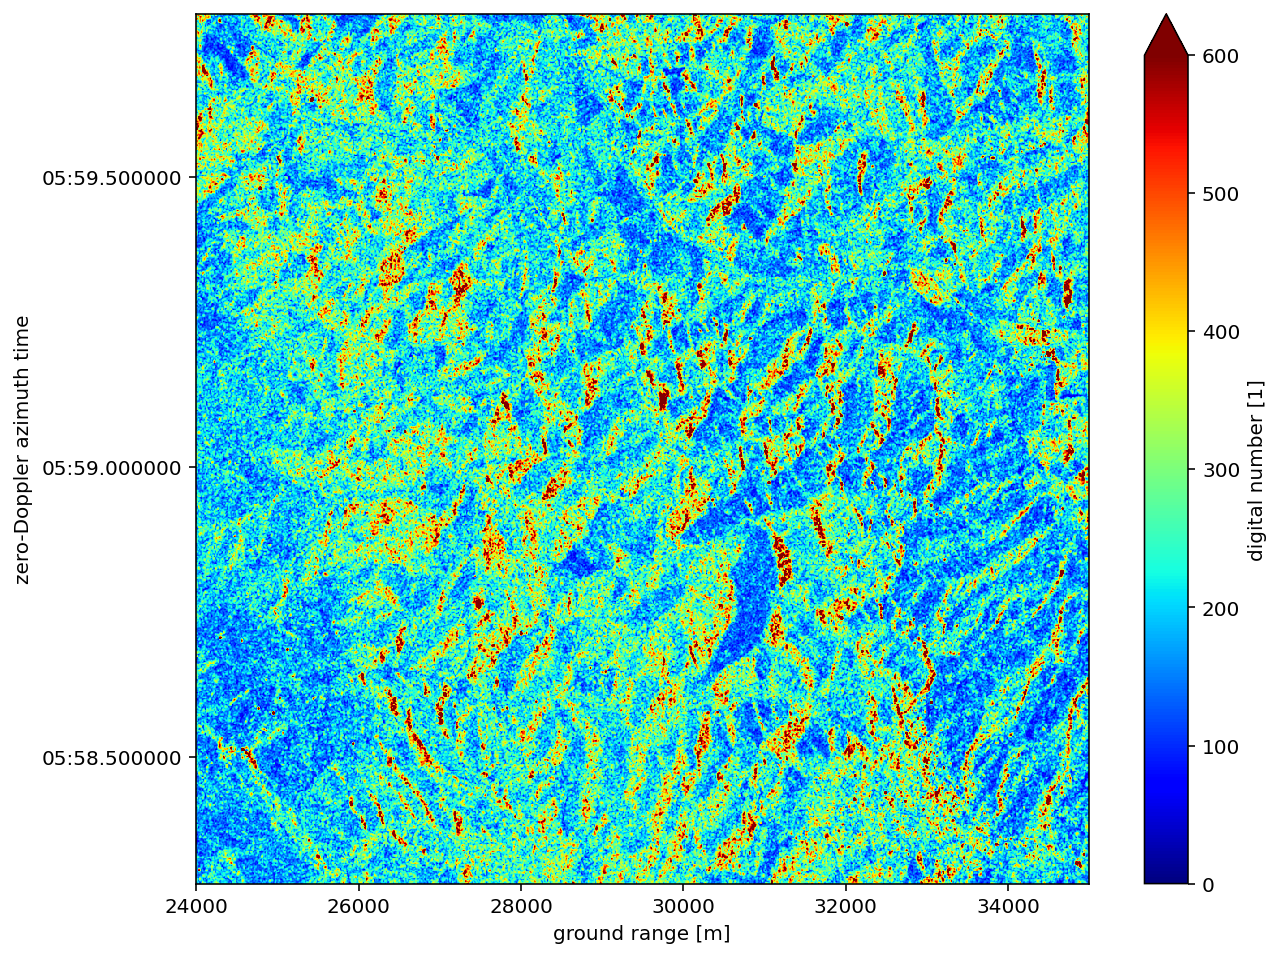

In [11]:
mb = abs(measurement_block).plot(y="azimuth_time", vmin=0, vmax=600, cmap=plt.cm.jet)


In [12]:
s1_gcp = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/gcp"
)
s1_gcp

<xarray.Dataset>
Dimensions:           (azimuth_time: 10, slant_range_time: 21)
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2021-11-23T17:05:55.28669...
  * slant_range_time  (slant_range_time) float64 0.005332 0.005377 ... 0.006437
    line              (azimuth_time) int64 ...
    pixel             (slant_range_time) int64 ...
Data variables:
    latitude          (azimuth_time, slant_range_time) float64 ...
    longitude         (azimuth_time, slant_range_time) float64 ...
    height            (azimuth_time, slant_range_time) float64 ...
    incidenceAngle    (azimuth_time, slant_range_time) float64 ...
    elevationAngle    (azimuth_time, slant_range_time) float64 ...
Attributes: (12/17)
    constellation:              sentinel-1
    platform:                   sentinel-1b
    instrument:                 ['c-sar']
    sat:orbit_state:            ascending
    sat:absolute_orbit:         29718
    sat:relative_orbit:         117
    ...                         ...
    xs:instrument_mode_swaths:  ['IW']
    group:                      /IW/VV/gcp
    Conventions:                CF-1.8
    title:                      Geolocation grid
    comment:                    The dataset contains geolocation grid point e...
    history:                    created by xarray_sentinel-0.3

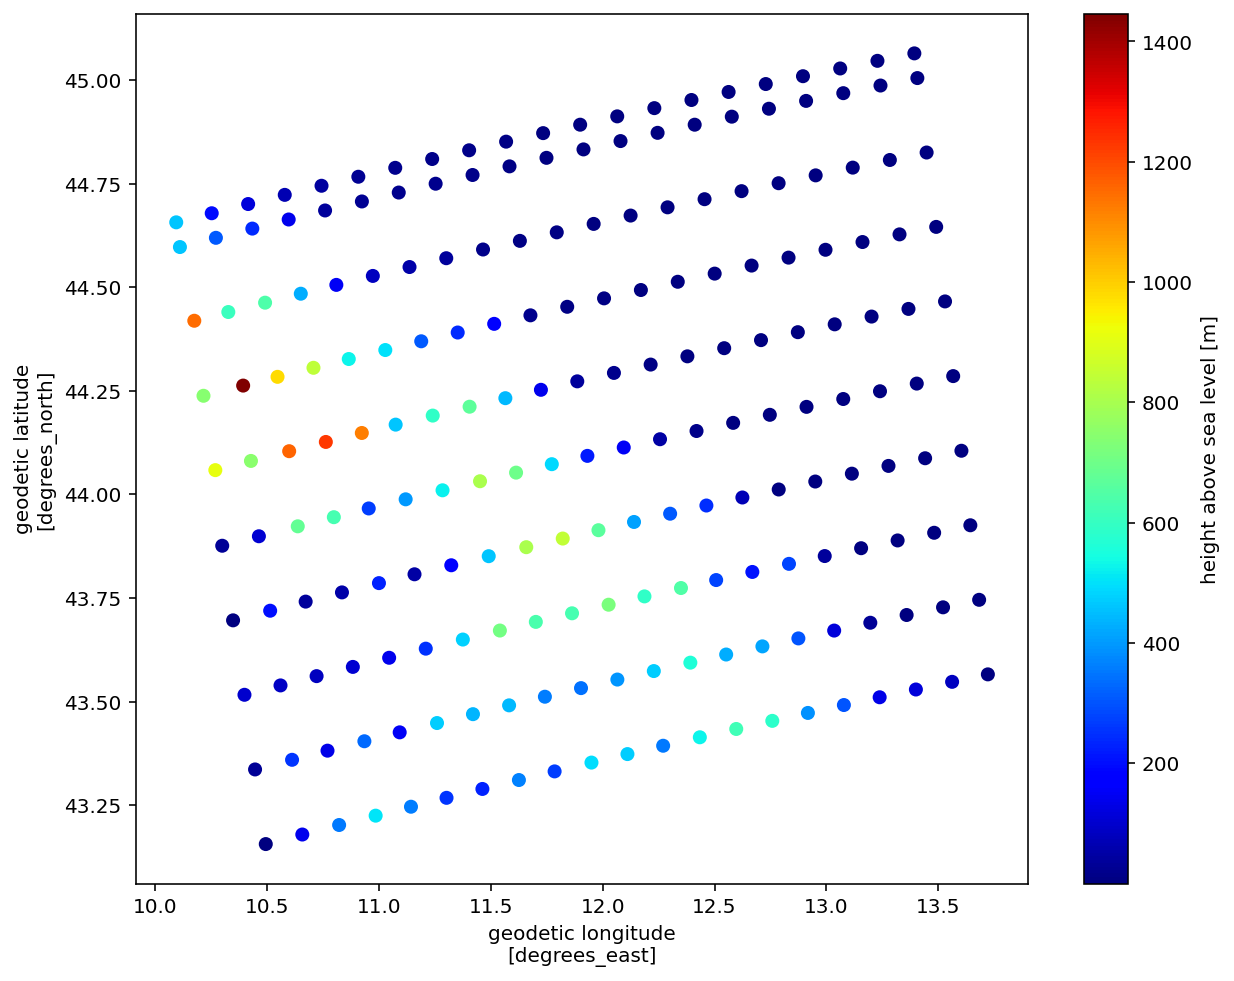

In [13]:
gcp_scatter = s1_gcp.plot.scatter(x="longitude", y="latitude", hue="height",cmap=plt.cm.jet)


In [14]:
s1_orbit = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/orbit"
)
s1_orbit

<xarray.Dataset>
Dimensions:       (axis: 3, azimuth_time: 16)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2021-11-23T17:04:51 ... 2021-...
  * axis          (axis) int64 0 1 2
Data variables:
    position      (axis, azimuth_time) float64 ...
    velocity      (axis, azimuth_time) float64 ...
Attributes: (12/18)
    reference_system:           Earth Fixed
    constellation:              sentinel-1
    platform:                   sentinel-1b
    instrument:                 ['c-sar']
    sat:orbit_state:            ascending
    sat:absolute_orbit:         29718
    ...                         ...
    xs:instrument_mode_swaths:  ['IW']
    group:                      /IW/VV/orbit
    Conventions:                CF-1.8
    title:                      Orbit information used by the IPF during proc...
    comment:                    The dataset contains a sets of orbit state ve...
    history:                    created by xarray_sentinel-0.3

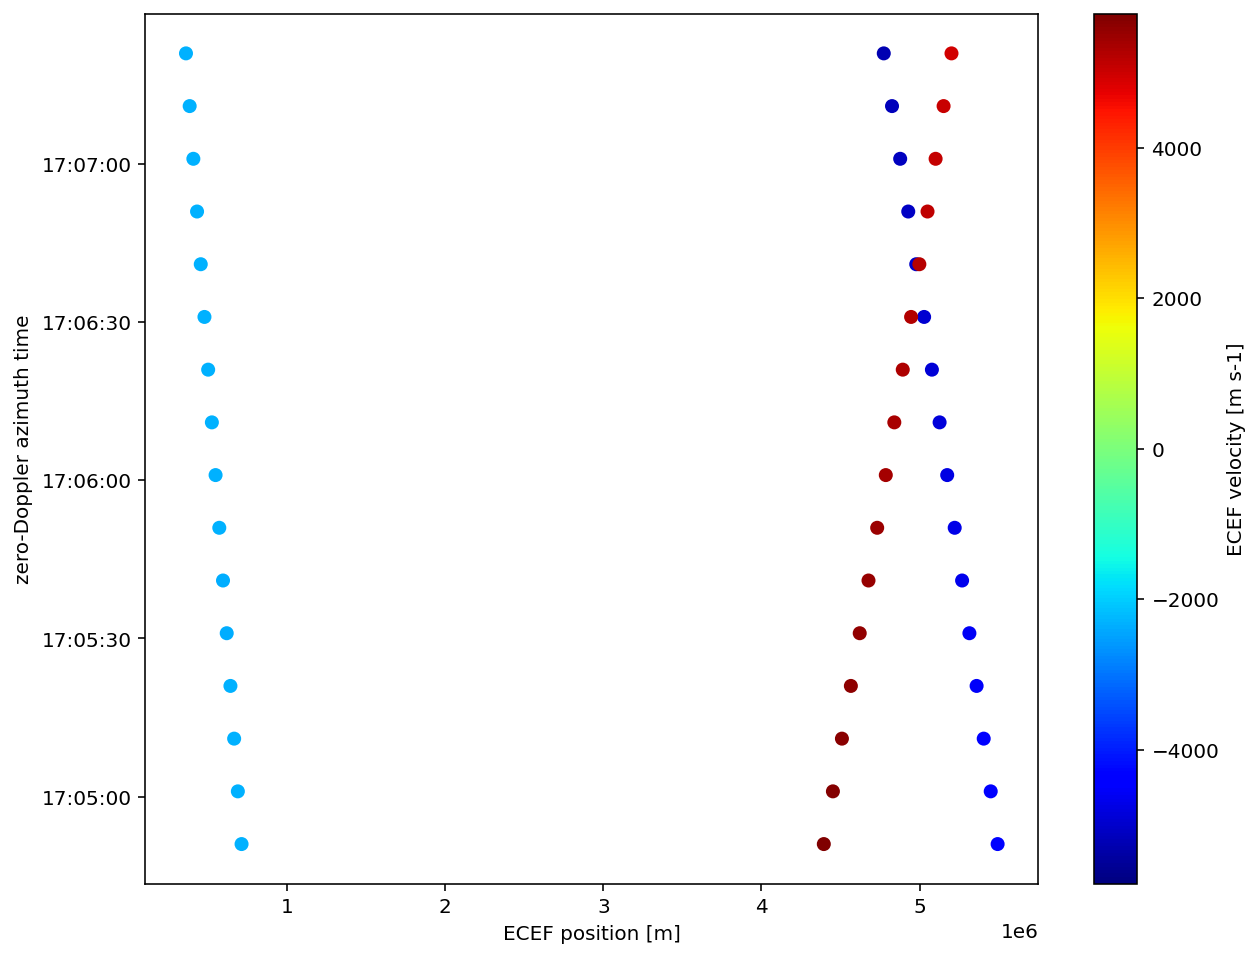

In [15]:
s1_orbit.plot.scatter(y="azimuth_time", x="position", hue="velocity",cmap=plt.cm.jet)
